In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

In [3]:
data = pd.read_excel('1645792390_cep1_dataset.xlsx')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1.	Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [4]:
print('Shape of the data :',data.shape)

Shape of the data : (303, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Find out missing values

data.isna().sum().any()

False

In [7]:
# Find out duplicates

data.duplicated().sum()

1

In [8]:
data = data[data.duplicated() == False]
print('Shape of the dataset after removing duplicates :',data.shape)

Shape of the dataset after removing duplicates : (302, 14)


# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

c.	Study the occurrence of CVD across the Age category

d.	Study the composition of all patients with respect to the Sex category

e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

f.	Describe the relationship between cholesterol levels and a target variable

g.	State what relationship exists between peak exercising and the occurrence of a heart attack

h.	Check if thalassemia is a major cause of CVD

i.	List how the other factors determine the occurrence of CVD

j.	Use a pair plot to understand the relationship between all the given variables

### a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [9]:
data.mean()

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

In [10]:
data.median()

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [11]:
data.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


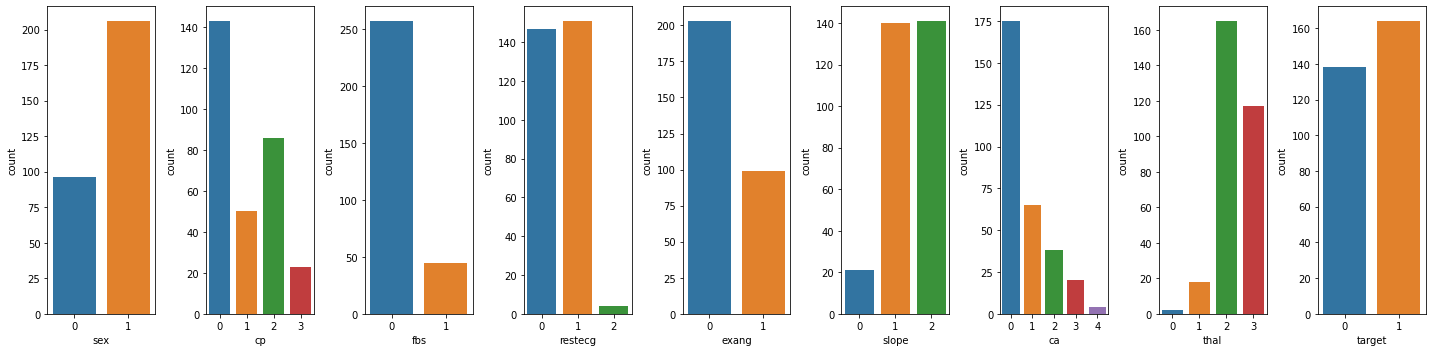

In [13]:
cols = data[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']] 

n=len(cols.columns)
fig,ax = plt.subplots(1,n, figsize=(20,5))
for i in range(n):
    plt.sca(ax[i])
    col = cols.columns[i]
    sns.countplot(cols[col].values)
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

## c. Study the occurrence of CVD across the Age category

In [14]:
bins = [20,40,60,80]
agegroup = ['Adult','Middle Age','Senior Citizen']
data['agegrp'] = pd.cut(data['age'],bins=bins,labels=agegroup,right=False)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,agegrp
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Senior Citizen
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Middle Age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Middle Age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Middle Age
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Middle Age
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Senior Citizen
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Middle Age


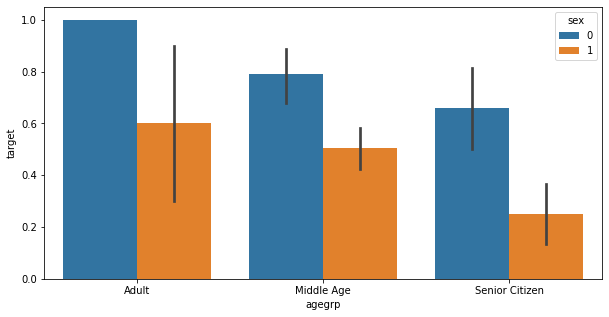

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x='agegrp',y='target',data=data,hue='sex')
plt.show()

### d. Study the composition of all patients with respect to the Sex category

In [16]:
data['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [17]:
data.groupby(by='sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


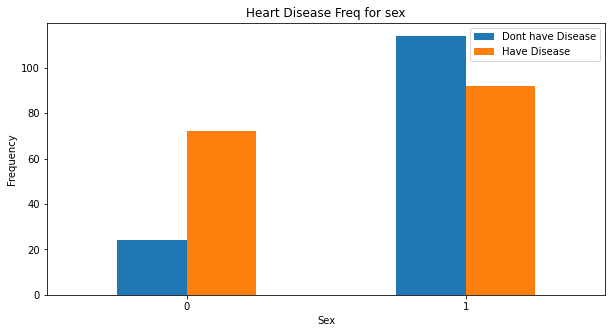

In [18]:
pd.crosstab(data['sex'],data['target']).plot(kind='bar',figsize=(10,5))
plt.title('Heart Disease Freq for sex')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.legend(['Dont have Disease','Have Disease'])
plt.show()

### e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [19]:
data['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

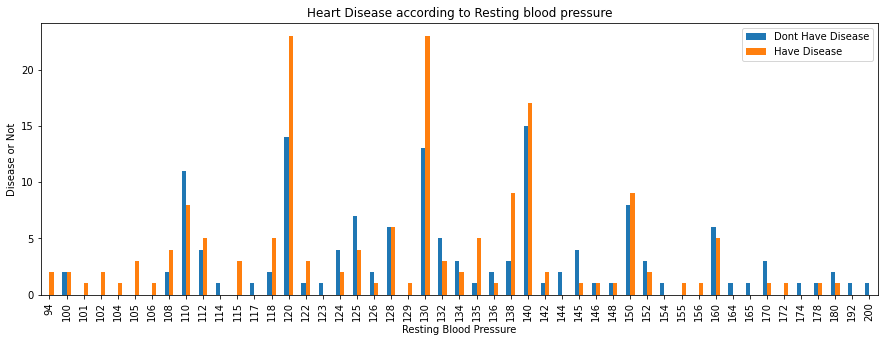

In [20]:
pd.crosstab(data['trestbps'],data['target']).plot(kind='bar',figsize=(15,5))
plt.title('Heart Disease according to Resting blood pressure')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Disease or Not')
plt.legend(['Dont Have Disease','Have Disease'])
plt.show()

### f. Describe the relationship between cholesterol levels and a target variable

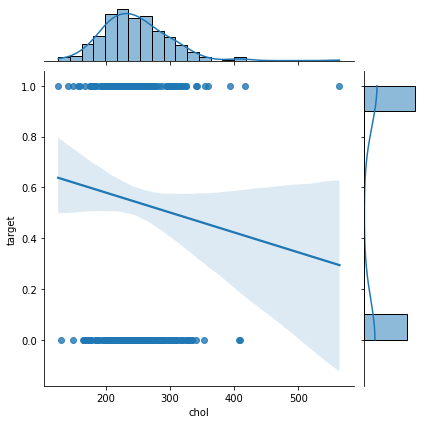

In [21]:
sns.jointplot(x='chol',y='target',data=data,height=6,kind='reg')

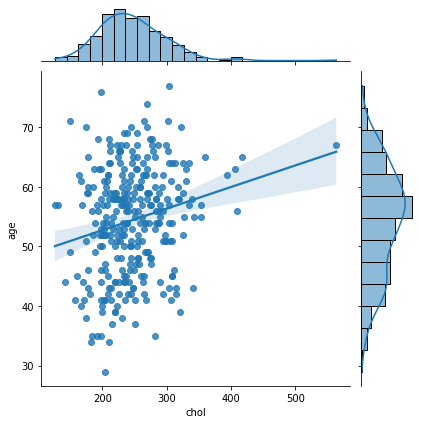

In [22]:
sns.jointplot(x='chol',y='age',data=data,height=6,kind='reg')

### g. State what relationship exists between peak exercising and the occurrence of a heart attack

<AxesSubplot:xlabel='slope', ylabel='target'>

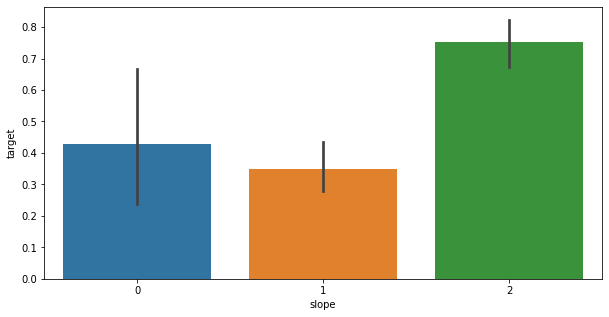

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data['slope'],data['target'])

### h. Check if thalassemia is a major cause of CVD

<AxesSubplot:xlabel='thal', ylabel='target'>

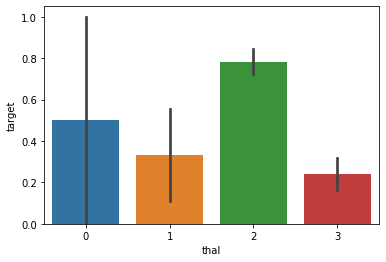

In [24]:
sns.barplot(data['thal'],data['target'])

### i. List how the other factors determine the occurrence of CVD

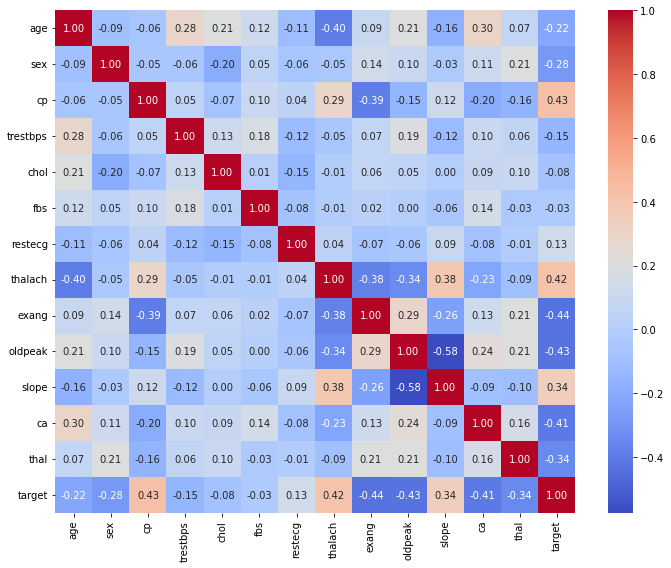

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.tight_layout()
plt.show()

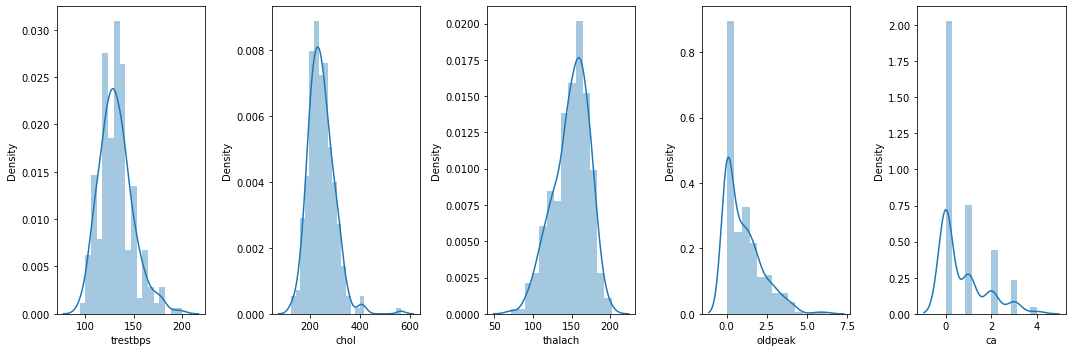

In [26]:
cols = data[['trestbps','chol','thalach','oldpeak','ca']]

n_samples = len(cols.columns)
plt.figure(figsize=(15,5))
for i in range(n_samples):
    col = cols.columns[i]
    plt.subplot(1,n_samples,1 + i)
    sns.distplot(cols[col].values)
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

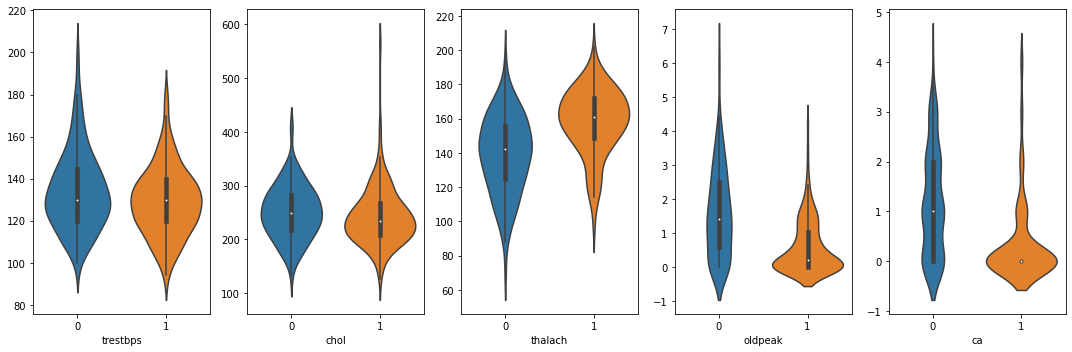

In [27]:
cols = data[['trestbps','chol','thalach','oldpeak','ca','target']]

plt.figure(figsize=(15,5))
for i in range(n_samples):
    col = cols.columns[i]
    plt.subplot(1,n_samples,1 + i)
    sns.violinplot(x='target',y=cols[col].values,data=cols)
    plt.xlabel(col)
    plt.tight_layout()
plt.show()

### j. Use a pair plot to understand the relationship between all the given variables

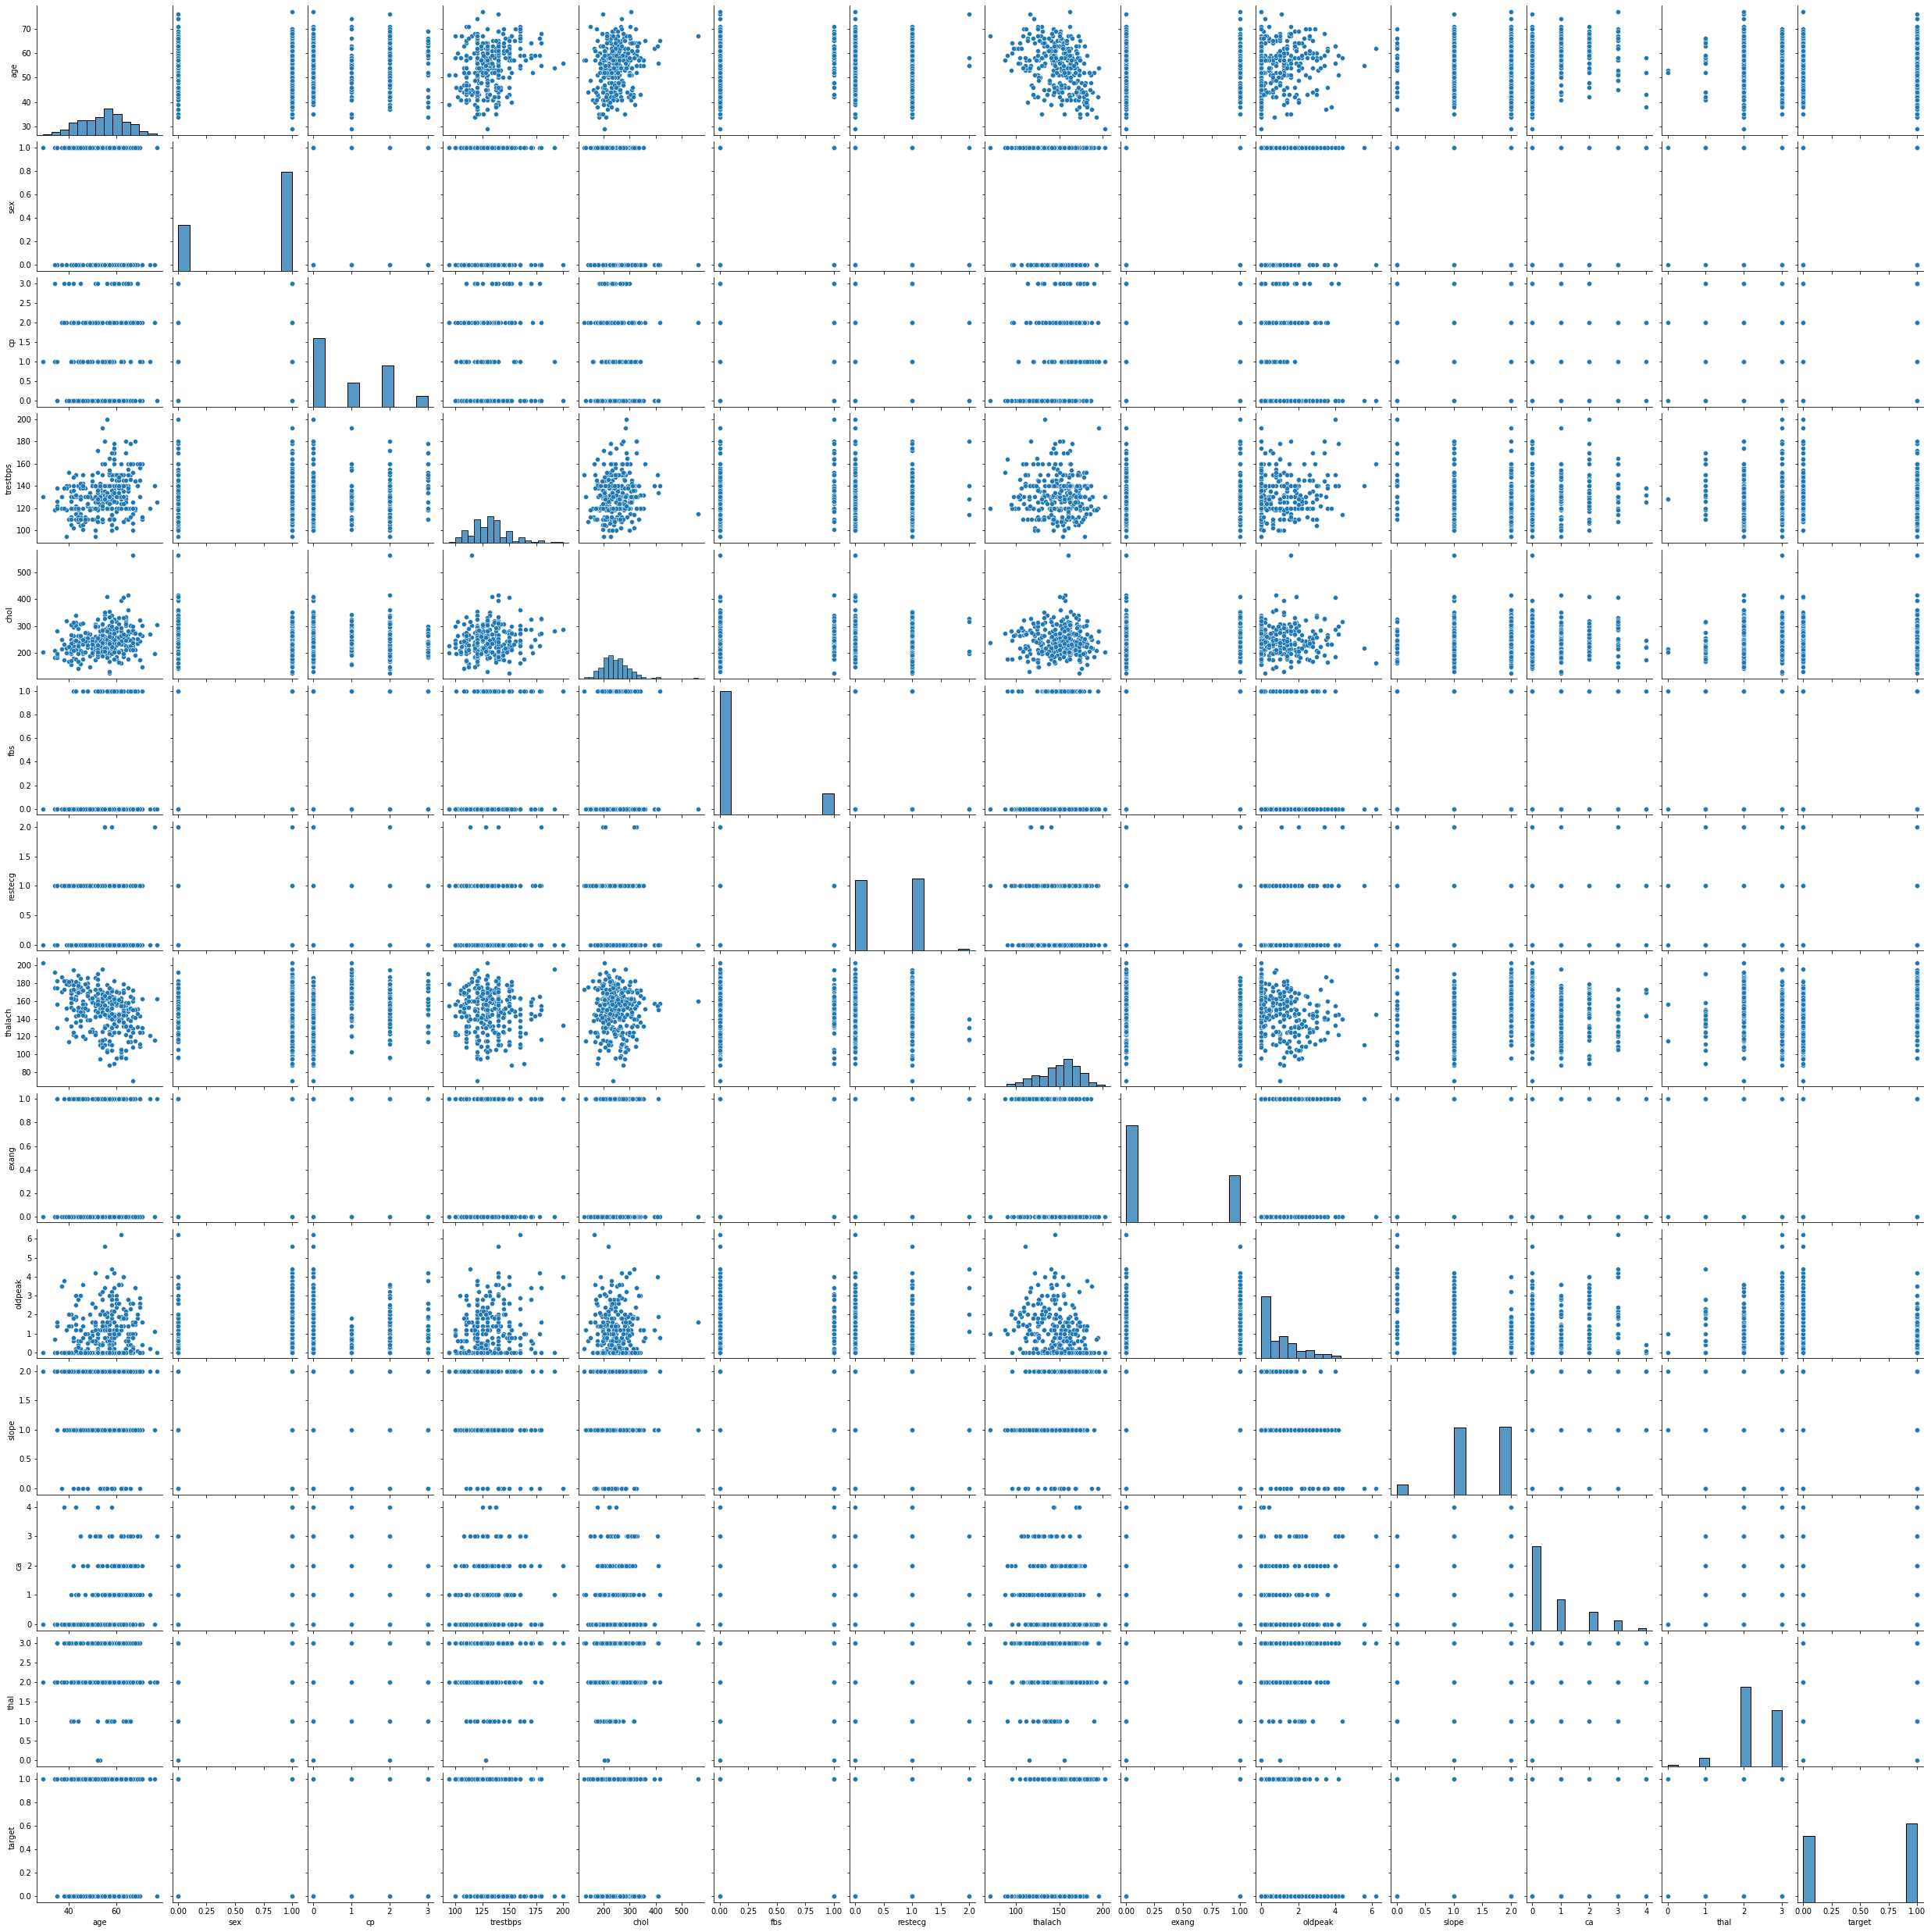

In [28]:
sns.pairplot(data)

# 3. Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [29]:
data = data.drop('agegrp',axis=1)

In [30]:
x = data.drop('target',axis=1)
y = data['target']

In [31]:
# Scale the data in 0-1.
scaler = StandardScaler()
data_scale = pd.DataFrame(scaler.fit_transform(x))
data_scale.columns = x.columns

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(data_scale,y,test_size=0.2,random_state=41)
(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

((241, 13), (61, 13), (241,), (61,))

## Logistic Regression

In [33]:
lr_model = LogisticRegression()
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [34]:
def evalution(test,pred):
    print('Accuracy Score :',accuracy_score(test,pred))
    print('\nConfusion Maxtrix :\n',confusion_matrix(test,pred))
    print('\n Classification Report :\n',classification_report(test,pred))

In [35]:
preds =lr_model.predict(xtest)
evalution(ytest,preds)

Accuracy Score : 0.7868852459016393

Confusion Maxtrix :
 [[31  8]
 [ 5 17]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.79      0.83        39
           1       0.68      0.77      0.72        22

    accuracy                           0.79        61
   macro avg       0.77      0.78      0.78        61
weighted avg       0.80      0.79      0.79        61



## Random Forest Classifier

In [36]:
rfc_model = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [37]:
rfc_pred = rfc_model.predict(xtest)
evalution(ytest,rfc_pred)

Accuracy Score : 0.819672131147541

Confusion Maxtrix :
 [[32  7]
 [ 4 18]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.82      0.85        39
           1       0.72      0.82      0.77        22

    accuracy                           0.82        61
   macro avg       0.80      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



In [38]:
param_grid = { 
    'n_estimators': [100, 150, 200, 250],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}

rfc_model = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv= 5)
CV_rfc.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250]})

In [39]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 100}

In [40]:
rfc_model_tune = RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=4,max_features='sqrt')
rfc_model_tune.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=500)

In [41]:
rfc_pred_tune = rfc_model_tune.predict(xtest)
evalution(ytest,rfc_pred_tune)

Accuracy Score : 0.8360655737704918

Confusion Maxtrix :
 [[32  7]
 [ 3 19]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.73      0.86      0.79        22

    accuracy                           0.84        61
   macro avg       0.82      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61



In [42]:
csq1=chi2_contingency(pd.crosstab(data['thalach'], data['target']))
print("P-value: ",csq1[1])

P-value:  0.07918631828372703
